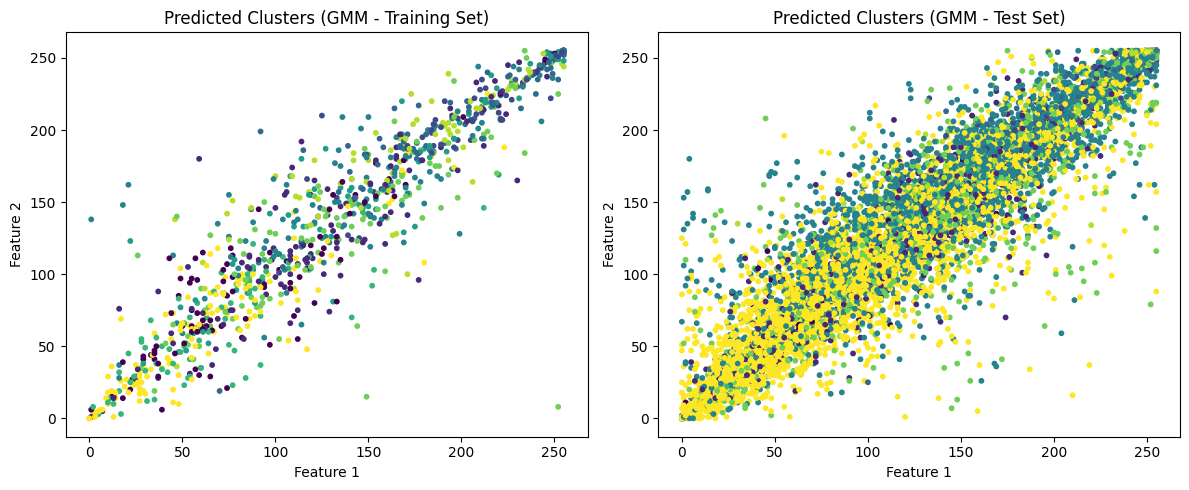

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.datasets import cifar10

# Load a subset of CIFAR-10 for testing
(train_images, _), (test_images, _) = cifar10.load_data()
train_images = train_images[:1000]  # Use a smaller subset for testing

# Preprocess images
train_images_flat = train_images.reshape((len(train_images), -1))
test_images_flat = test_images.reshape((len(test_images), -1))

# Standardize data
scaler = StandardScaler()
train_images_scaled = scaler.fit_transform(train_images_flat)
test_images_scaled = scaler.transform(test_images_flat)

# Apply GMM clustering to training images
num_clusters = 10
gmm = GaussianMixture(n_components=num_clusters, n_init=10, max_iter=100, random_state=42)

# Fit the model
train_predictions = gmm.fit_predict(train_images_scaled)

# Use the trained model to predict clusters for test images
test_predictions = gmm.predict(test_images_scaled)

# Visualize predicted clusters for training images
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(train_images_flat[:, 0], train_images_flat[:, 1], c=train_predictions, cmap='viridis', s=10)
plt.title('Predicted Clusters (GMM - Training Set)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Visualize predicted clusters for test images
plt.subplot(1, 2, 2)
plt.scatter(test_images_flat[:, 0], test_images_flat[:, 1], c=test_predictions, cmap='viridis', s=10)
plt.title('Predicted Clusters (GMM - Test Set)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()
